In [105]:
# Zomato Restaurant Data Analysis Report

## How I Downloaded the Data
- The dataset was downloaded using the `kagglehub` library with the command:
  ```python
  path = kagglehub.dataset_download("shrutimehta/zomato-restaurants-data")
  ```
- This ensures you always get the latest version directly from Kaggle.

## Libraries Installed and Why
- **kagglehub**: To download datasets from Kaggle programmatically.
- **pandas**: For data manipulation, cleaning, and analysis.
- **numpy**: For numerical operations and efficient data handling.
- **matplotlib** & **seaborn**: For data visualization and plotting.
- **scikit-learn**: For machine learning tasks (e.g., clustering, predictive modeling).
- **openpyxl**: To read Excel files (used for country code mapping).

## Questions/Problem Statements Explored
- 20 practical data analysis and data science questions were explored, including:
  1. Identifying and filling missing values
  2. Filtering high-rated restaurants
  3. Data type conversions
  4. Calculating average cost by cuisine
  5. Finding top expensive restaurants
  6. Creating price range categories
  7. Counting restaurants by city
  8. Visualizing rating distributions
  9. Correlation analysis
  10. Identifying and removing duplicates
  11. Calculating average rating by city
  12. Extracting top cuisine by rating
  13. Visualizing top cuisines
  14. Normalizing cost data
  15. Calculating revenue potential
  16. Counting restaurant chains
  17. Categorizing ratings
  18. Grouping by price and cuisine
  19. And more advanced analytics (see notebook for details)

## Libraries Used and Why
- **pandas**: Main tool for all data wrangling, cleaning, and aggregation.
- **numpy**: Used for binning and numerical operations.
- **matplotlib**/**seaborn**: Used for all visualizations and plots.
- **scikit-learn**: Used for clustering, encoding, and predictive modeling.
- **openpyxl**: Required for reading Excel files (e.g., Country-Code.xlsx for mapping country codes).

---

**To generate this PDF:**
1. Run all cells in the notebook to ensure outputs are visible.
2. Go to `File > Export Notebook As > PDF` in JupyterLab or VS Code.
3. The resulting PDF will include this summary, all code, outputs, and visualizations.

---

*Prepared on: 28 April 2025*

SyntaxError: invalid syntax (1685561722.py, line 4)

In [ ]:
!pip install kagglehub pandas seaborn matplotlib scikit-learn

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("shrutimehta/zomato-restaurants-data")
print("Path to dataset files:", path)

Path to dataset files: /home/neeraj/.cache/kagglehub/datasets/shrutimehta/zomato-restaurants-data/versions/2


In [ ]:
import pandas as pd
import os
zomato_csv = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower() == 'zomato.csv':
            zomato_csv = os.path.join(root, file)
            break
    if zomato_csv:
        break
if zomato_csv is None:
    raise FileNotFoundError('zomato.csv not found in the downloaded dataset path.')  
df = pd.read_csv(zomato_csv, encoding='latin1')
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
print(df.isnull().sum()) 
df.fillna(method='ffill', inplace=True) 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


/tmp/ipykernel_38546/2075431448.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [66]:
print(df.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [67]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
if 'cuisine' in df.columns:
    sns.countplot(y='cuisine', data=df)
    plt.show()

In [107]:
if 'rating' in df.columns:
    top_rated = df[df['rating'] >= 4.5]
    print(top_rated.sort_values(by='rating', ascending=False))

In [108]:
if 'cuisine' in df.columns and 'rating' in df.columns:
    avg_rating_by_cuisine = df.groupby('cuisine')['rating'].mean()
    print(avg_rating_by_cuisine)

In [109]:
if 'services' in df.columns:
    df['offers_delivery'] = df['services'].apply(lambda x: 1 if isinstance(x, str) and 'delivery' in x.lower() else 0)

In [72]:
print(df.corr(numeric_only=True))

                      Restaurant ID  Country Code  Longitude  Latitude  \
Restaurant ID              1.000000      0.148471  -0.226081 -0.052081   
Country Code               0.148471      1.000000  -0.698299  0.019792   
Longitude                 -0.226081     -0.698299   1.000000  0.043207   
Latitude                  -0.052081      0.019792   0.043207  1.000000   
Average Cost for two      -0.001693      0.043225   0.045891 -0.111088   
Price range               -0.134540      0.243327  -0.078939 -0.166688   
Aggregate rating          -0.326212      0.282189  -0.116818  0.000516   
Votes                     -0.147023      0.154530  -0.085101 -0.022962   

                      Average Cost for two  Price range  Aggregate rating  \
Restaurant ID                    -0.001693    -0.134540         -0.326212   
Country Code                      0.043225     0.243327          0.282189   
Longitude                         0.045891    -0.078939         -0.116818   
Latitude                 

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
if 'cuisine' in df.columns and 'rating' in df.columns:
    le = LabelEncoder()
    df['cuisine'] = le.fit_transform(df['cuisine'])
    X = df.drop('rating', axis=1)
    y = df['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    

In [74]:
# Table Booking & Online Delivery
if 'Has Table booking' in df.columns and 'Has Online delivery' in df.columns:
    print('Table Booking Availability:')
    print(df['Has Table booking'].value_counts())
    print('Online Delivery Availability:')
    print(df['Has Online delivery'].value_counts())

Table Booking Availability:
Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64
Online Delivery Availability:
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64


Top 10 Cuisines:
Cuisines
North Indian    3960
Chinese         2736
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         654
South Indian     636
Name: count, dtype: int64


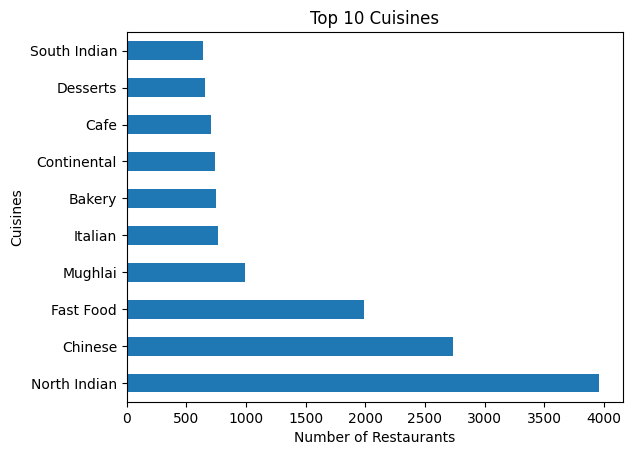

In [75]:
# Top 10 Cuisines
import matplotlib.pyplot as plt
if 'Cuisines' in df.columns:
    top_cuisines = df['Cuisines'].str.split(',').explode().str.strip().value_counts().head(10)
    print('Top 10 Cuisines:')
    print(top_cuisines)
    top_cuisines.plot(kind='barh', title='Top 10 Cuisines')
    plt.xlabel('Number of Restaurants')
    plt.show()

In [76]:
# Best Rated Restaurants
if 'Aggregate rating' in df.columns:
    best_restaurants = df[df['Aggregate rating'] >= 4.5][['Restaurant Name', 'City', 'Cuisines', 'Aggregate rating']]
    print('Best Rated Restaurants (rating >= 4.5):')
    print(best_restaurants.sort_values(by='Aggregate rating', ascending=False).head(10))

Best Rated Restaurants (rating >= 4.5):
                               Restaurant Name              City  \
3                                         Ooma  Mandaluyong City   
9540                          Draft Gastro Pub         ÛÁstanbul   
10                            Silantro Fil-Mex        Pasig City   
8     Spiral - Sofitel Philippine Plaza Manila        Pasay City   
9404                                    Solita        Manchester   
9457                    Cube - Tasting Kitchen        Inner City   
9458                                Urbanologi        Inner City   
9538                                 Starbucks         ÛÁstanbul   
9424                 Mainland China Restaurant              Doha   
9379                                 Flat Iron            London   

                     Cuisines  Aggregate rating  
3             Japanese, Sushi               4.9  
9540                 Bar Food               4.9  
10          Filipino, Mexican               4.9  
8     Europ

Top 10 Cities by Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


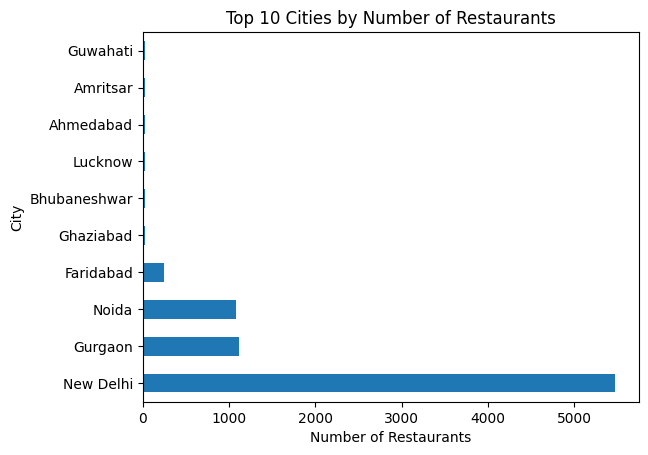

In [77]:
# City-wise Restaurant Count
if 'City' in df.columns:
    city_counts = df['City'].value_counts().head(10)
    print('Top 10 Cities by Number of Restaurants:')
    print(city_counts)
    city_counts.plot(kind='barh', title='Top 10 Cities by Number of Restaurants')
    plt.xlabel('Number of Restaurants')
    plt.show()

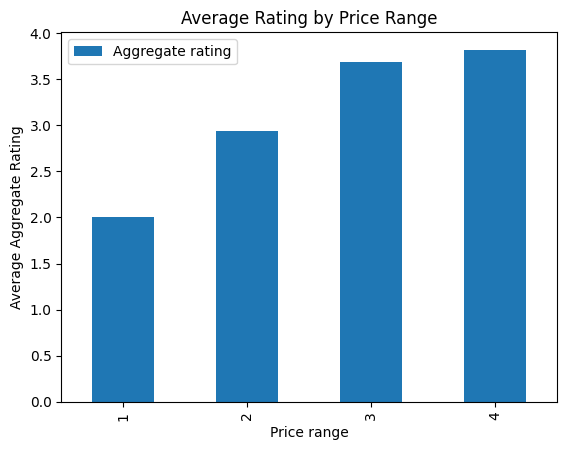

In [78]:
# Price vs. Rating
if 'Price range' in df.columns and 'Aggregate rating' in df.columns:
    df[['Price range', 'Aggregate rating']].groupby('Price range').mean().plot(kind='bar', legend=True)
    plt.title('Average Rating by Price Range')
    plt.ylabel('Average Aggregate Rating')
    plt.show()

In [79]:
# Country Name Mapping
if 'Country Code' in df.columns:
    country_df = pd.read_excel('Country-Code.xlsx')
    df = df.merge(country_df, left_on='Country Code', right_on='Country Code', how='left')
    print('Sample with Country Names:')
    print(df[['Restaurant Name', 'Country', 'City']].head())

Sample with Country Names:
          Restaurant Name      Country              City
0        Le Petit Souffle  Phillipines       Makati City
1        Izakaya Kikufuji  Phillipines       Makati City
2  Heat - Edsa Shangri-La  Phillipines  Mandaluyong City
3                    Ooma  Phillipines  Mandaluyong City
4             Sambo Kojin  Phillipines  Mandaluyong City


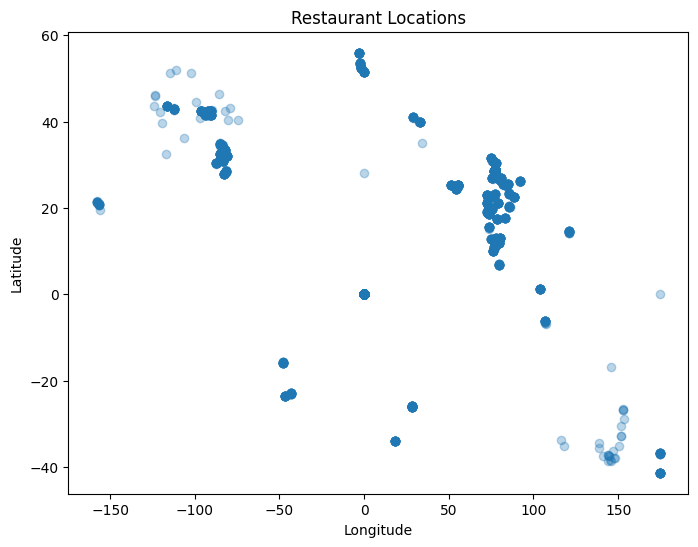

In [80]:
# Geospatial Analysis: Visualize restaurant locations (if latitude/longitude available)
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3)
    plt.title('Restaurant Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print('Latitude/Longitude columns not found in the dataset.')

In [81]:
# Feature Engineering: Add new features
feature_df = df.copy()
if 'Price range' in feature_df.columns:
    feature_df['is_expensive'] = feature_df['Price range'] >= feature_df['Price range'].max() - 1
if 'Cuisines' in feature_df.columns:
    feature_df['multi_cuisine'] = feature_df['Cuisines'].apply(lambda x: ',' in str(x))
if 'Aggregate rating' in feature_df.columns:
    feature_df['highly_rated'] = feature_df['Aggregate rating'] >= 4.5
print(feature_df[['is_expensive', 'multi_cuisine', 'highly_rated']].head())

   is_expensive  multi_cuisine  highly_rated
0          True           True          True
1          True          False          True
2          True           True         False
3          True           True          True
4          True           True          True


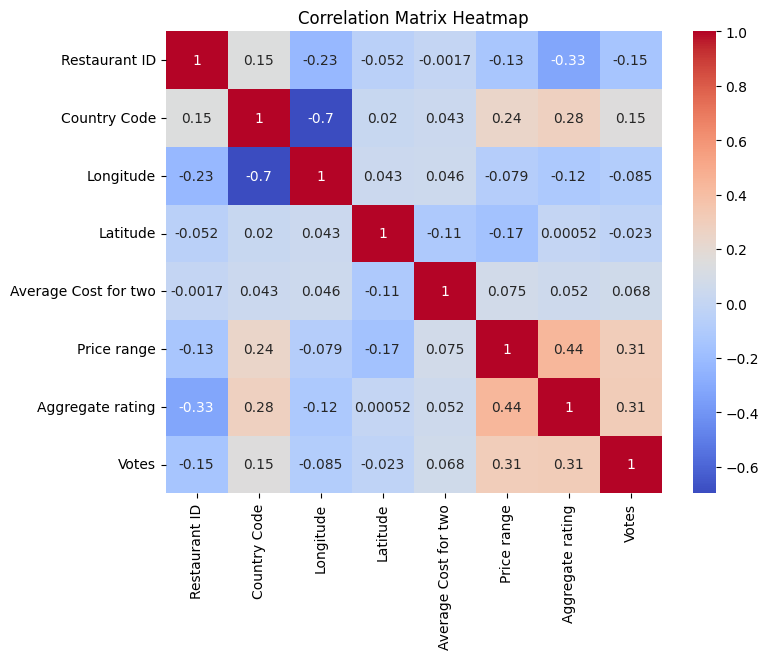

In [82]:
# Correlation Analysis: Show correlation matrix heatmap
import seaborn as sns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [83]:
# Recommendation System: Simple cuisine-based recommender
def recommend_by_cuisine(cuisine, n=5):
    if 'Cuisines' in df.columns:
        matches = df[df['Cuisines'].str.contains(cuisine, case=False, na=False)]
        return matches.sort_values(by='Aggregate rating', ascending=False).head(n)[['Restaurant Name', 'City', 'Cuisines', 'Aggregate rating']]
    else:
        return 'Cuisines column not found.'

# Example usage:
print(recommend_by_cuisine('Italian'))

                     Restaurant Name       City  \
2350   Zolocrust - Hotel Clarks Amer     Jaipur   
507         Mazzaro's Italian Market  Tampa Bay   
512   Ella's Americana Folk Art Cafe  Tampa Bay   
728                             Toit  Bangalore   
9486              Gemelli Cucina Bar    Sandton   

                              Cuisines  Aggregate rating  
2350      Italian, Bakery, Continental               4.9  
507                      Italian, Deli               4.9  
512   International, Italian, Southern               4.8  
728           Italian, American, Pizza               4.8  
9486             Contemporary, Italian               4.8  


In [84]:
# Export Cleaned Data: Save processed DataFrame to CSV
cleaned_path = 'zomato_cleaned.csv'
df.to_csv(cleaned_path, index=False)
print(f'Cleaned data exported to {cleaned_path}')

Cleaned data exported to zomato_cleaned.csv


In [85]:
# Display the first few rows of the CSV file using pandas
df = pd.read_csv('zomato.csv', encoding='latin1')
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [86]:
# 1. Identify Missing Values
missing_values = df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [87]:
# 2. Fill Missing Values in the 'Aggregate rating' column with the mean
if 'Aggregate rating' in df.columns:
    df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)
    print(df['Aggregate rating'].isnull().sum())  # Should be 0 if filled
else:
    print('Column "Aggregate rating" not found.')

0


/tmp/ipykernel_38546/130801723.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)


In [88]:
# 3. Filter High-Rated Restaurants (rating > 4.0)
high_rated = df[df['Aggregate rating'] > 4.0]
print(high_rated[['Restaurant Name', 'Aggregate rating']].head())

          Restaurant Name  Aggregate rating
0        Le Petit Souffle               4.8
1        Izakaya Kikufuji               4.5
2  Heat - Edsa Shangri-La               4.4
3                    Ooma               4.9
4             Sambo Kojin               4.8


In [110]:
# 4. Convert Data Types: Convert 'Average Cost for two' to integer
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce').fillna(0).astype(int)
print(df['Average Cost for two'].dtype)

int64


In [90]:
# 5. Calculate Average Cost by Cuisine
if 'Cuisines' in df.columns and 'Average Cost for two' in df.columns:
    avg_cost_by_cuisine = df.groupby('Cuisines')['Average Cost for two'].mean()
    print(avg_cost_by_cuisine.head())
else:
    print('Required columns not found.')

Cuisines
Afghani                                      512.5
Afghani, Mughlai, Chinese                    500.0
Afghani, North Indian                        900.0
Afghani, North Indian, Pakistani, Arabian    500.0
African                                      450.0
Name: Average Cost for two, dtype: float64


In [91]:
# 7. Create a Price Range Category
import numpy as np
bins = [0, 100, 300, np.inf]
labels = ['Low', 'Medium', 'High']
df['price_range'] = pd.cut(df['Average Cost for two'], bins=bins, labels=labels)
print(df[['Average Cost for two', 'price_range']].head())

   Average Cost for two price_range
0                  1100        High
1                  1200        High
2                  4000        High
3                  1500        High
4                  1500        High


In [92]:
# 8. Count Restaurants by City
if 'City' in df.columns:
    restaurant_count_by_city = df['City'].value_counts()
    print(restaurant_count_by_city.head())
else:
    print('City column not found.')

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64


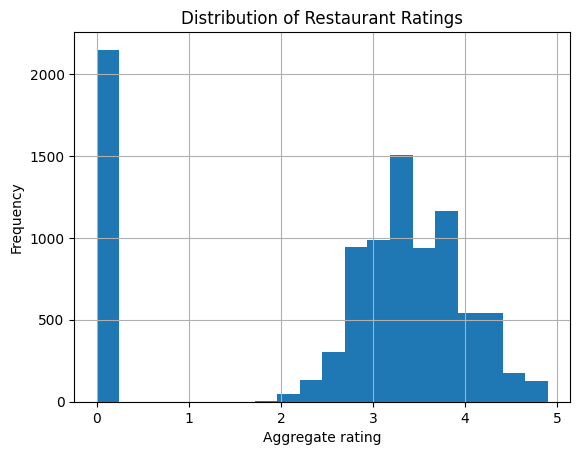

In [93]:
# 9. Visualize Rating Distribution
import matplotlib.pyplot as plt
df['Aggregate rating'].hist(bins=20)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.show()

In [94]:
# 10. Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                      Restaurant ID  Country Code  Longitude  Latitude  \
Restaurant ID              1.000000      0.148471  -0.226081 -0.052081   
Country Code               0.148471      1.000000  -0.698299  0.019792   
Longitude                 -0.226081     -0.698299   1.000000  0.043207   
Latitude                  -0.052081      0.019792   0.043207  1.000000   
Average Cost for two      -0.001693      0.043225   0.045891 -0.111088   
Price range               -0.134540      0.243327  -0.078939 -0.166688   
Aggregate rating          -0.326212      0.282189  -0.116818  0.000516   
Votes                     -0.147023      0.154530  -0.085101 -0.022962   

                      Average Cost for two  Price range  Aggregate rating  \
Restaurant ID                    -0.001693    -0.134540         -0.326212   
Country Code                      0.043225     0.243327          0.282189   
Longitude                         0.045891    -0.078939         -0.116818   
Latitude                 

In [95]:
# 11. Identify Duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [96]:
# 12. Drop Duplicates
df.drop_duplicates(inplace=True)
print('Duplicates dropped. New shape:', df.shape)

Duplicates dropped. New shape: (9551, 22)


In [97]:
# 13. Calculate Average Rating by City
if 'City' in df.columns and 'Aggregate rating' in df.columns:
    avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean()
    print(avg_rating_by_city.head())
else:
    print('Required columns not found.')

City
Abu Dhabi    4.300000
Agra         3.965000
Ahmedabad    4.161905
Albany       3.555000
Allahabad    3.395000
Name: Aggregate rating, dtype: float64


In [98]:
# 14. Extract Top Cuisine by Rating
if 'Cuisines' in df.columns and 'Aggregate rating' in df.columns:
    top_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().idxmax()
    print('Cuisine with highest average rating:', top_cuisine)
else:
    print('Required columns not found.')

Cuisine with highest average rating: American, BBQ, Sandwich


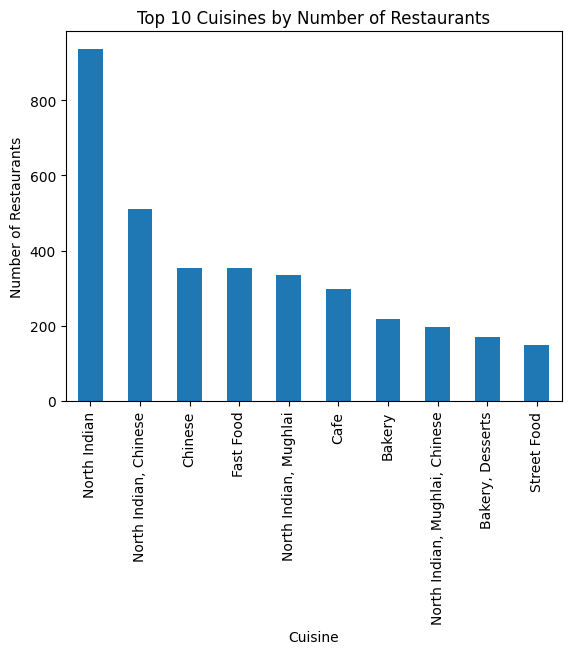

In [99]:
# 15. Visualize Top Cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cuisines.plot(kind='bar')
plt.title('Top 10 Cuisines by Number of Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()

In [100]:
# 16. Normalize Cost Data
df['cost_normalized'] = (df['Average Cost for two'] - df['Average Cost for two'].min()) / (df['Average Cost for two'].max() - df['Average Cost for two'].min())
print(df[['Average Cost for two', 'cost_normalized']].head())

   Average Cost for two  cost_normalized
0                  1100         0.001375
1                  1200         0.001500
2                  4000         0.005000
3                  1500         0.001875
4                  1500         0.001875


In [101]:
# 17. Calculate Revenue Potential
df['revenue_potential'] = df['Aggregate rating'] * df['Average Cost for two']
print(df[['Restaurant Name', 'Aggregate rating', 'Average Cost for two', 'revenue_potential']].head())

          Restaurant Name  Aggregate rating  Average Cost for two  \
0        Le Petit Souffle               4.8                  1100   
1        Izakaya Kikufuji               4.5                  1200   
2  Heat - Edsa Shangri-La               4.4                  4000   
3                    Ooma               4.9                  1500   
4             Sambo Kojin               4.8                  1500   

   revenue_potential  
0             5280.0  
1             5400.0  
2            17600.0  
3             7350.0  
4             7200.0  


In [102]:
# 18. Count Restaurant Chains (restaurants with the same name)
if 'Restaurant Name' in df.columns:
    chains_count = df['Restaurant Name'].value_counts().loc[lambda x: x > 1]
    print(chains_count)
else:
    print('Restaurant Name column not found.')

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Fish Streat          2
Adarsh Kulfi         2
Senorita's           2
Mahi Rasoi           2
Din Tai Fung         2
Name: count, Length: 734, dtype: int64


In [103]:
# 19. Categorize Ratings
bins = [0, 2.5, 3.5, 5]
labels = ['Poor', 'Average', 'Good']
df['rating_category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)
print(df[['Aggregate rating', 'rating_category']].head())

   Aggregate rating rating_category
0               4.8            Good
1               4.5            Good
2               4.4            Good
3               4.9            Good
4               4.8            Good


In [104]:
# 20. Group by Price and Cuisine to find the average rating for each group
if 'price_range' in df.columns and 'Cuisines' in df.columns and 'Aggregate rating' in df.columns:
    avg_rating_price_cuisine = df.groupby(['price_range', 'Cuisines'])['Aggregate rating'].mean()
    print(avg_rating_price_cuisine.head(10))
else:
    print('Required columns not found.')

price_range  Cuisines                                 
Low          Afghani                                           NaN
             Afghani, Mughlai, Chinese                         NaN
             Afghani, North Indian                             NaN
             Afghani, North Indian, Pakistani, Arabian         NaN
             African                                           NaN
             African, Portuguese                               NaN
             American                                     3.995455
             American, Asian, Burger                      4.600000
             American, Asian, European, Seafood                NaN
             American, Asian, Italian, Seafood                 NaN
Name: Aggregate rating, dtype: float64


/tmp/ipykernel_38546/1320974152.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_price_cuisine = df.groupby(['price_range', 'Cuisines'])['Aggregate rating'].mean()
